# Lab 7 Word Embeddings

Word embeddings are real-number vectors that represent words from a vocabulary, and have broad applications in the area of natural language processing (NLP).

Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. 



To use word embeddings, you have two primary options:

- Use pre-trained models that you can download online (easiest)
- Train custom models using your own data and the Word2Vec (or another) algorithm (harder and may take longer time, but maybe better!)


## Using Spacy for Word Embeddings

Spacy is a natural language processing (NLP) library for Python designed to have fast performance, and with word embedding models built in, it’s perfect for a quick and easy start. 


## Pre-trained model
In today’s lab, we are going to examine how to load a pre-trained model using Spacy
Why a pre-trained model? 

It is important to note that building useful models takes a long time - hours or days to train a large corpus - and that for our purposes it is best to import an existing model rather than take the time to train our own…since we only have 2 hours of lab session ..
 
To take advantage of built-in word vectors we'll need a larger library

We are going to use en_core_web_md as our model ((116MB) Vectors: 685k keys, 20k unique vectors (300 dimensions) ) (https://spacy.io/models/en)
This model is trained using the word2Vec algorithm

Let's download the core English model:


In [1]:
import spacy
# Load the spacy model that you have installed
!python -m spacy download en_core_web_md
import spacy
import en_core_web_md
nlp = en_core_web_md.load()

# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-20 15:14:05.339671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 388 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## Vector values

So what does a word vector look like? 

Since spaCy employs 300 dimensions, word vectors are stored as 300-item arrays.

Now, let’s get the vector for the word ‘text’ from the sentence i.e doc[3]. Use the following command:

In [2]:
doc[5].vector


array([ -1.8607  ,   0.15804 ,  -4.1425  ,  -8.6359  , -16.955   ,
         1.157   ,  -1.588   ,   5.6609  , -12.03    ,  16.417   ,
         4.1907  ,   5.5122  ,  -0.11932 ,  -6.06    ,   3.8957  ,
        -7.8212  ,   3.6736  , -14.824   ,  -7.6638  ,   2.5344  ,
         7.9893  ,   3.6785  ,   4.3296  , -11.338   ,  -3.5506  ,
        -5.899   ,   1.0998  ,   3.4515  ,  -5.4191  ,   1.8356  ,
        -2.902   ,  -7.9294  ,  -1.1269  ,   8.4124  ,   5.1416  ,
        -3.1489  ,  -4.2061  ,  -1.459   ,   7.8313  ,   0.27859 ,
        -4.3832  ,   8.0756  ,  -0.94784 ,  -6.1214  ,   8.2792  ,
         5.0529  ,  -8.3611  ,  -6.0743  ,  -0.53773 ,   2.7538  ,
         3.8162  ,  -4.1612  ,   0.7591  ,  -2.8374  ,  -6.4851  ,
        -3.3435  ,   3.2703  ,   2.759   ,   2.6645  ,   4.0013  ,
        13.381   ,  -5.2907  ,  -3.133   ,   4.5374  , -11.899   ,
        -6.716   ,  -0.041939,  -2.0879  ,   3.0101  ,  10.3     ,
         2.6835  ,   2.7265  ,   8.3018  ,  -4.4563  ,  14.43 

## Using random words or sentence

Try this and observe the output:


In [3]:
nlp(u'lion').vector


array([  1.2746  ,   0.46242 ,  -1.1829  ,  -5.2661  ,  -2.7128  ,
         1.8521  ,  -0.94273 ,   2.1865  ,   6.503   ,   0.6704  ,
         1.5361  ,   2.5992  ,  -0.36233 ,   4.3965  ,  -6.5644  ,
         1.6141  ,  -1.2897  ,   2.1184  ,  -0.63654 ,  -3.4572  ,
        -4.3771  ,   4.2074  ,  -3.6411  ,  -0.97214 ,   1.3253  ,
        -2.3125  ,  -3.6531  ,  -2.8398  ,   2.7913  ,  -1.53    ,
        -2.9984  ,  -2.6357  ,   0.50615 ,  -2.6925  ,   4.3401  ,
        -5.6017  ,   0.045691,   4.3832  ,  -0.19535 ,  -1.0751  ,
         0.32172 ,   2.4395  ,   4.6638  ,   3.4471  ,  -3.3847  ,
        -1.8238  ,   0.70212 ,   0.58557 ,   5.0032  ,  -3.1072  ,
         1.2364  ,   7.4595  ,   0.057368,   1.0111  ,  -1.0827  ,
         0.69113 ,   2.8009  ,  -3.4383  ,  -1.0599  ,  -2.2627  ,
        -5.149   ,  -5.0636  ,   3.1405  ,   1.0793  ,  -0.72892 ,
        -3.9939  ,  -0.69551 ,  -0.55767 ,   3.2555  ,  -2.9449  ,
         4.7114  ,   1.6388  ,   1.3828  ,   1.4255  ,  -3.233

Now, try a sentence:


In [4]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')
doc.vector


array([-1.7769655 ,  0.39714497, -1.695121  , -0.1089559 ,  3.861494  ,
       -0.10778303, -0.02750097,  3.191314  ,  1.0857747 , -0.2615487 ,
        4.0720797 ,  1.5932049 , -2.7569218 ,  0.70982707,  2.0976841 ,
        0.08150103,  0.8847861 , -0.505237  ,  0.767067  , -2.88911   ,
       -0.28514975, -0.331664  ,  0.306348  , -2.25347   ,  0.96798134,
       -0.030282  , -3.765162  , -2.168157  ,  1.3985709 ,  2.175709  ,
       -0.81103534, -0.55156004, -1.033463  , -2.3130198 , -2.892054  ,
       -2.843568  , -0.33247897,  1.620013  ,  3.03307   , -0.42730814,
        1.298548  ,  0.18969259,  1.234282  , -0.14263602, -1.427765  ,
       -0.05807757,  0.33836406, -1.6987331 , -2.13661   ,  0.10412004,
        0.62479395,  3.9712129 , -0.31110606, -1.9676571 , -0.11860895,
        0.55582994, -0.660888  ,  1.947435  ,  1.6391805 ,  0.6569032 ,
        0.054408  , -2.08993   ,  1.0370519 ,  0.5363236 ,  0.00807395,
       -0.91060096, -3.3870788 , -1.4823462 ,  1.4170542 ,  0.32

What's interesting is that doc objects themselves have vectors, derived from the averages of individual token vectors. 


Check the dimension using this:


In [5]:
nlp(u'lion').vector.shape


(300,)

## Identifying similar vectors

The best way to view vector relationships is through the .similarity() method of Doc tokens. Use this:


In [6]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))


lion lion 1.0
lion cat 0.3854507803916931
lion pet 0.20031584799289703
cat lion 0.3854507803916931
cat cat 1.0
cat pet 0.732966423034668
pet lion 0.20031584799289703
pet cat 0.732966423034668
pet pet 1.0


Note that order doesn't matter. token1.similarity(token2) has the same value as token2.similarity(token1).


## Table view

To view this as a table, use the following command:


In [7]:
# For brevity, assign each token a name
a,b,c = tokens

# Display as a Markdown table (this only works in Jupyter!)
from IPython.display import Markdown, display
display(Markdown(f'<table><tr><th></th><th>{a.text}</th><th>{b.text}</th><th>{c.text}</th></tr>\
<tr><td>**{a.text}**</td><td>{a.similarity(a):{.4}}</td><td>{b.similarity(a):{.4}}</td><td>{c.similarity(a):{.4}}</td></tr>\
<tr><td>**{b.text}**</td><td>{a.similarity(b):{.4}}</td><td>{b.similarity(b):{.4}}</td><td>{c.similarity(b):{.4}}</td></tr>\
<tr><td>**{c.text}**</td><td>{a.similarity(c):{.4}}</td><td>{b.similarity(c):{.4}}</td><td>{c.similarity(c):{.4}}</td></tr>'))


<table><tr><th></th><th>lion</th><th>cat</th><th>pet</th></tr><tr><td>**lion**</td><td>1.0</td><td>0.3855</td><td>0.2003</td></tr><tr><td>**cat**</td><td>0.3855</td><td>1.0</td><td>0.733</td></tr><tr><td>**pet**</td><td>0.2003</td><td>0.733</td><td>1.0</td></tr>

## Vector relationship

As expected, we see the strongest similarity between "cat" and "pet", the weakest between "lion" and "pet", and some similarity between "lion" and "cat". A word will have a perfect (1.0) similarity with itself.

If you're curious, the similarity between "lion" and "dandelion" is very small:



In [8]:
nlp(u'lion').similarity(nlp(u'dandelion'))


0.14681951826673326

By the way, dandelion is flower :)

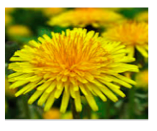

## Vector arithmetic

Believe it or not, we can actually calculate new vectors by adding and subtracting related vectors. A famous example suggests
"king" - "man" + "woman" = "queen”

Let's try it out!


In [9]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])


['king', 'the', 'and', 'that', 'havin', 'where', 'processing', 'she', 'they', 'woman']


Try other arithmetic function on the vectors. For this week's lab, there is no submission of assignment. Hooray!!